In [1]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

plt.style.use('fivethirtyeight')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kerojol\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kerojol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kerojol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kerojol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Preprocessing for Small Cap Companies

In [2]:
smallcap = pd.read_csv('smallcap.csv')


In [3]:
smallcap

Tweets Symbol  \
0     Market Trending: 20230629\n\nAll trends remain...    IWM   
1     Current Portfolio:\n$ACLS\n$SMCI\n$AMAM (2/3)\...    IWM   
2     GENERAL MARKET:\n- Confirmed Uptrend: 🟢\n- New...    IWM   
3      Correct,nothing bearish I see intraday either...    IWM   
4     Correct,nothing bearish I see intraday either ...    IWM   
...                                                 ...    ...   
4994  $AKR  new alert at https://t.co/A7qrDarJHY  #s...    AKR   
4995  Top 5 #altcoins that outperformed $BTC on the ...    TNC   
4996  Top 5 #altcoins that outperformed $BTC on the ...    TNC   
4997  Tennant Co. Shares Close in on 52-Week High - ...    TNC   
4998  RT @PeterPawns: @PawChain Interesting 👀\n$BAT ...    TNC   

      Follower Count ChatGPT_Sentiment Manual_Sentiment  
0                290           Neutral         Positive  
1               1029           Neutral          Neutral  
2               1029           Neutral          Neutral  
3              11878          Positive         Positive  
4              11878          Positive         Positive  
...              ...               ...              ...  
4994            6877           Neutral          Neutral  
4995            2391           Neutral          Neutral  
4996            2391           Neutral          Neutral  
4997            9425           Neutral          Neutral  
4998             541           Neutral          Neutral  

[4999 rows x 5 columns]

In [4]:
# Count the occurrences of each sentiment label
sentiment_counts = smallcap['Manual_Sentiment'].value_counts()

# Access the counts of each sentiment
positive_count = sentiment_counts.get('Positive', 0)
negative_count = sentiment_counts.get('Negative', 0)
neutral_count = sentiment_counts.get('Neutral', 0)

# Print the counts
print("Positive tweets:", positive_count)
print("Negative tweets:", negative_count)
print("Neutral tweets:", neutral_count)

Positive tweets: 1139
Negative tweets: 561
Neutral tweets: 3299


In [5]:
# DATA PREPROCESSING

# Create a function clean the text
stop_words = set(stopwords.words('english'))

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
  text = re.sub(r'#', '', text) # Remove the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) # Remove RT
  text = re.sub(r'[^\w\s]','',text) # Remove punctuation
  text = re.sub(r'https?:\/\/\S+', '', text) # Remove the hyper link
  text = re.sub(r'\d+', '', text) # Remove numbers
  text = re.sub(r'\n', '', text) # remove \n
  text = text.lower()
  tokens = word_tokenize(text)
  tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]
  cleaned_text = " ".join(tokens)

  return cleaned_text

In [6]:
smallcap = smallcap.drop('Follower Count', axis=1)
smallcap['Tweets'] = smallcap['Tweets'].astype(str)
smallcap['Tweets'] = smallcap['Tweets'].apply(cleanTxt)
smallcap

Tweets Symbol  \
0     market trending trend remain upno sign issuena...    IWM   
1     current portfolioaclssmciamam sofi mdb fubo im...    IWM   
2     general market confirmed uptrend new highlows ...    IWM   
3     correctnothing bearish see intraday either e n...    IWM   
4     correctnothing bearish see intraday either e n...    IWM   
...                                                 ...    ...   
4994  akr new alert httpstcoaqrdarjhy stock daytradi...    AKR   
4995  top altcoins outperformed btc last min candles...    TNC   
4996  top altcoins outperformed btc last min candles...    TNC   
4997  tennant co share close week high market mover ...    TNC   
4998  interesting bat osmo xch xem hot rvn celo abbc...    TNC   

     ChatGPT_Sentiment Manual_Sentiment  
0              Neutral         Positive  
1              Neutral          Neutral  
2              Neutral          Neutral  
3             Positive         Positive  
4             Positive         Positive  
...                ...              ...  
4994           Neutral          Neutral  
4995           Neutral          Neutral  
4996           Neutral          Neutral  
4997           Neutral          Neutral  
4998           Neutral          Neutral  

[4999 rows x 4 columns]

In [7]:
# Subjectivity and Polarity

#create a funciton to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Analyze to 3 categories
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

#create two new columns in df
smallcap['textblob_subjectivity'] = smallcap['Tweets'].apply(getSubjectivity)
smallcap['textblob_polarity'] = smallcap['Tweets'].apply(getPolarity)
smallcap['textblob_sentiment'] = smallcap['textblob_polarity'].apply(getAnalysis)

#show dataframe with new columns
smallcap

Tweets Symbol  \
0     market trending trend remain upno sign issuena...    IWM   
1     current portfolioaclssmciamam sofi mdb fubo im...    IWM   
2     general market confirmed uptrend new highlows ...    IWM   
3     correctnothing bearish see intraday either e n...    IWM   
4     correctnothing bearish see intraday either e n...    IWM   
...                                                 ...    ...   
4994  akr new alert httpstcoaqrdarjhy stock daytradi...    AKR   
4995  top altcoins outperformed btc last min candles...    TNC   
4996  top altcoins outperformed btc last min candles...    TNC   
4997  tennant co share close week high market mover ...    TNC   
4998  interesting bat osmo xch xem hot rvn celo abbc...    TNC   

     ChatGPT_Sentiment Manual_Sentiment  textblob_subjectivity  \
0              Neutral         Positive               0.000000   
1              Neutral          Neutral               0.450000   
2              Neutral          Neutral               0.651515   
3             Positive         Positive               0.250000   
4             Positive         Positive               0.250000   
...                ...              ...                    ...   
4994           Neutral          Neutral               0.454545   
4995           Neutral          Neutral               0.368889   
4996           Neutral          Neutral               0.283333   
4997           Neutral          Neutral               0.540000   
4998           Neutral          Neutral               0.675000   

      textblob_polarity textblob_sentiment  
0              0.000000            Neutral  
1              0.000000            Neutral  
2              0.195455           Positive  
3              0.020833           Positive  
4              0.020833           Positive  
...                 ...                ...  
4994           0.136364           Positive  
4995           0.220000           Positive  
4996           0.250000           Positive  
4997           0.160000           Positive  
4998           0.375000           Positive  

[4999 rows x 7 columns]

### Accuracy of sentiment analysis of small cap companies using TextBlob against Manual Sentiment

In [8]:
manual_sentiment_smallcap = smallcap['Manual_Sentiment']
textblob_sentiment_smallcap = smallcap['textblob_sentiment']

# Calculate accuracy
accuracy = classification_report(manual_sentiment_smallcap, textblob_sentiment_smallcap)

print("Accuracy:", accuracy)

Accuracy:               precision    recall  f1-score   support

    Negative       0.16      0.17      0.17       561
     Neutral       0.68      0.45      0.55      3299
    Positive       0.27      0.51      0.35      1139

    accuracy                           0.44      4999
   macro avg       0.37      0.38      0.35      4999
weighted avg       0.53      0.44      0.46      4999



### Accuracy of sentiment analysis of small cap companies using TextBlob against ChatGPT

In [9]:
chatgpt_sentiment_smallcap = smallcap['ChatGPT_Sentiment']
textblob_sentiment_smallcap = smallcap['textblob_sentiment']

# Calculate accuracy
accuracy = classification_report(chatgpt_sentiment_smallcap, textblob_sentiment_smallcap)

print("Accuracy:", accuracy)

Accuracy:               precision    recall  f1-score   support

    Negative       0.11      0.21      0.14       321
     Neutral       0.75      0.46      0.58      3554
    Positive       0.26      0.51      0.35      1124

    accuracy                           0.46      4999
   macro avg       0.37      0.39      0.35      4999
weighted avg       0.60      0.46      0.50      4999



### Accuracy of sentiment analysis of small cap companies using ChatGPT against actual sentiment (manual sentiment)

In [10]:
chatgpt_sentiment_smallcap = smallcap['ChatGPT_Sentiment']

# Calculate accuracy
accuracy = classification_report(chatgpt_sentiment_smallcap, manual_sentiment_smallcap)

print("Accuracy:", accuracy)

Accuracy:               precision    recall  f1-score   support

    Negative       0.45      0.79      0.57       321
     Neutral       0.83      0.77      0.80      3554
    Positive       0.54      0.55      0.55      1124

    accuracy                           0.72      4999
   macro avg       0.61      0.70      0.64      4999
weighted avg       0.74      0.72      0.73      4999



<AxesSubplot: title={'center': 'Sentiment Results (TextBlob)'}>

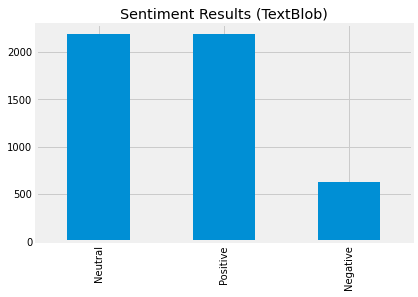

In [11]:
smallcap.textblob_sentiment.value_counts().plot(kind='bar', title="Sentiment Results (TextBlob)")

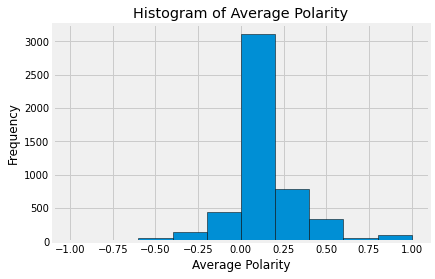

In [12]:
# Assuming you have a list of average polarity values
average_polarity = [0.2, 0.5, -0.3, 0.8, -0.1, 0.4, -0.2, 0.6, 0.7, -0.5]

# Plotting the histogram
plt.hist(smallcap['textblob_polarity'], bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Average Polarity')
plt.ylabel('Frequency')
plt.title('Histogram of Average Polarity')

# Displaying the histogram
plt.show()

In [13]:
smallcap.columns

Index(['Tweets', 'Symbol', 'ChatGPT_Sentiment', 'Manual_Sentiment',
       'textblob_subjectivity', 'textblob_polarity', 'textblob_sentiment'],
      dtype='object')

<Figure size 720x576 with 0 Axes>

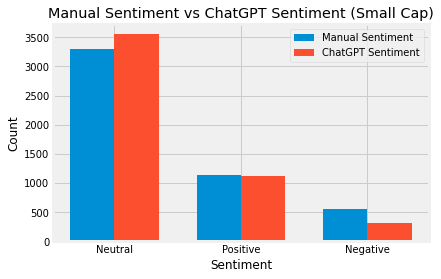

In [44]:
manual_sentiment_counts = smallcap['Manual_Sentiment'].value_counts()

# Count the occurrences of each sentiment label for 'textblob_sentiment' column
textblob_sentiment_counts = smallcap['ChatGPT_Sentiment'].value_counts()

# Get the unique sentiment labels
sentiment_labels = smallcap['Manual_Sentiment'].unique()

# Get the count of each sentiment label for both columns
manual_counts = [manual_sentiment_counts.get(label, 0) for label in sentiment_labels]
textblob_counts = [textblob_sentiment_counts.get(label, 0) for label in sentiment_labels]

# Sort the data in descending order
sorted_indices = np.argsort(manual_counts)[::-1]
manual_counts = np.array(manual_counts)[sorted_indices]
textblob_counts = np.array(textblob_counts)[sorted_indices]
sentiment_labels = sentiment_labels[sorted_indices]

# Set the position of the bars on the x-axis
x = range(len(sentiment_labels))

# Set the width of the bars
bar_width = 0.35

plt.figure(figsize=(10, 8))
# Create the grouped bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(x, manual_counts, bar_width, label='Manual Sentiment')
rects2 = ax.bar([val + bar_width for val in x], textblob_counts, bar_width, label='ChatGPT Sentiment')

# Add labels, title, and legend
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Manual Sentiment vs ChatGPT Sentiment (Small Cap)')
ax.set_xticks([val + bar_width/2 for val in x])
ax.set_xticklabels(sentiment_labels)
ax.legend()

# Display the chart
plt.show()


<Figure size 720x576 with 0 Axes>

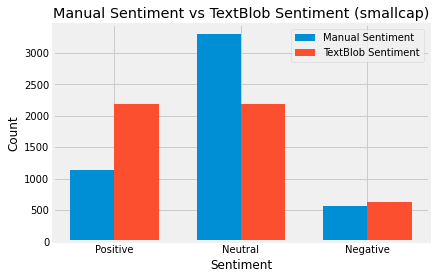

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'smallcap' and contains the 'Manual_Sentiment' and 'textblob_sentiment' columns

# Count the occurrences of each sentiment label for 'Manual_Sentiment' column
manual_sentiment_counts = smallcap['Manual_Sentiment'].value_counts()

# Count the occurrences of each sentiment label for 'textblob_sentiment' column
textblob_sentiment_counts = smallcap['textblob_sentiment'].value_counts()

# Get the unique sentiment labels
sentiment_labels = smallcap['Manual_Sentiment'].unique()

# Get the count of each sentiment label for both columns
manual_counts = [manual_sentiment_counts.get(label, 0) for label in sentiment_labels]
textblob_counts = [textblob_sentiment_counts.get(label, 0) for label in sentiment_labels]

# Set the position of the bars on the x-axis
x = range(len(sentiment_labels))

# Set the width of the bars
bar_width = 0.35

plt.figure(figsize=(10,8))
# Create the grouped bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(x, manual_counts, bar_width, label='Manual Sentiment')
rects2 = ax.bar([val + bar_width for val in x], textblob_counts, bar_width, label='TextBlob Sentiment')

# Add labels, title, and legend
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Manual Sentiment vs TextBlob Sentiment (smallcap)')
ax.set_xticks([val + bar_width/2 for val in x])
ax.set_xticklabels(sentiment_labels)
ax.legend()

# Display the chart
plt.show()


## Support Vector Machine

In [15]:
X = smallcap['Tweets']
y = smallcap['Manual_Sentiment']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80% training data

### Feature extraction using TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Train SVM Model

In [18]:
from sklearn.svm import SVC

In [19]:
svm = SVC()
svm.fit(X_train_tfidf,y_train)
y_pred = svm.predict(X_test_tfidf)

### Evaluation of SVM


In [20]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.783
Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.48      0.61       118
     Neutral       0.77      0.95      0.85       641
    Positive       0.82      0.48      0.60       241

    accuracy                           0.78      1000
   macro avg       0.81      0.64      0.69      1000
weighted avg       0.79      0.78      0.76      1000



### Hyperparameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create an SVM classifier
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best parameters to train the SVM model
best_svm = SVC(**best_params)
best_svm.fit(X_train_tfidf, y_train)

# Make predictions on the testing data using the best model
y_pred = best_svm.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.8079552565707134
Accuracy: 0.793
Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.57      0.67       118
     Neutral       0.80      0.92      0.86       641
    Positive       0.75      0.56      0.64       241

    accuracy                           0.79      1000
   macro avg       0.79      0.68      0.72      1000
weighted avg       0.79      0.79      0.78      1000



In [22]:
#create best svm model based on gridsearchCV
svm_best = SVC(C=10, gamma='scale', kernel='rbf')
svm_best.fit(X_train_tfidf,y_train)

SVC(C=10)

In [23]:
#apply svm sentiments into dataframe
X_tfidf = vectorizer.transform(smallcap['Tweets'])

#make predictions on all the data in the dataframe
svm_predictions = svm_best.predict(X_tfidf)

#add svm senitment predictions to the dataframe
smallcap['svm_sentiment'] = svm_predictions
smallcap.head()

Tweets Symbol ChatGPT_Sentiment  \
0  market trending trend remain upno sign issuena...    IWM           Neutral   
1  current portfolioaclssmciamam sofi mdb fubo im...    IWM           Neutral   
2  general market confirmed uptrend new highlows ...    IWM           Neutral   
3  correctnothing bearish see intraday either e n...    IWM          Positive   
4  correctnothing bearish see intraday either e n...    IWM          Positive   

  Manual_Sentiment  textblob_subjectivity  textblob_polarity  \
0         Positive               0.000000           0.000000   
1          Neutral               0.450000           0.000000   
2          Neutral               0.651515           0.195455   
3         Positive               0.250000           0.020833   
4         Positive               0.250000           0.020833   

  textblob_sentiment svm_sentiment  
0            Neutral      Positive  
1            Neutral       Neutral  
2           Positive       Neutral  
3           Positive      Positive  
4           Positive      Positive

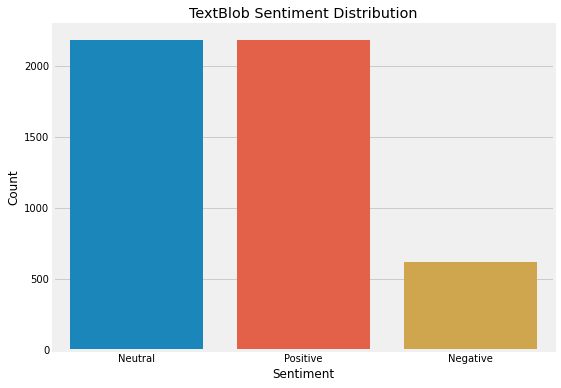

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
sns.countplot(data=smallcap, x='textblob_sentiment')
plt.title('TextBlob Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


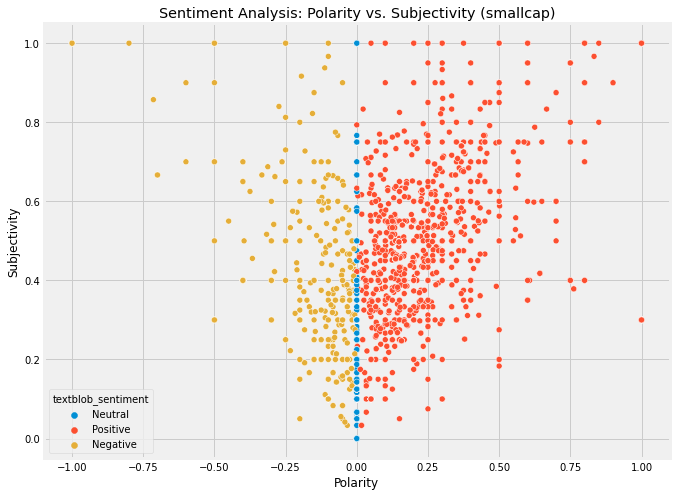

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=smallcap, x='textblob_polarity', y='textblob_subjectivity', hue='textblob_sentiment')
plt.title('Sentiment Analysis: Polarity vs. Subjectivity (smallcap)')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


## Display top 10 words in the positive, neutral, and negative classes and visualize them in a wordcloud

In [26]:
positive_tweets = smallcap[smallcap['textblob_sentiment'] == 'Positive']
neutral_tweets = smallcap[smallcap['textblob_sentiment'] == 'Neutral']
negative_tweets = smallcap[smallcap['textblob_sentiment'] == 'Negative']

In [27]:
def extract_words(tweets):
    words = []
    for tweet in tweets['Tweets']:
        words.extend(tweet.split())
    return words

positive_words = extract_words(positive_tweets)
neutral_words = extract_words(neutral_tweets)
negative_words = extract_words(negative_tweets)


In [28]:
from collections import Counter

positive_word_freq = Counter(positive_words)
neutral_word_freq = Counter(neutral_words)
negative_word_freq = Counter(negative_words)


get top 10 words

In [29]:
top_positive_words = positive_word_freq.most_common(10)
top_neutral_words = neutral_word_freq.most_common(10)
top_negative_words = negative_word_freq.most_common(10)

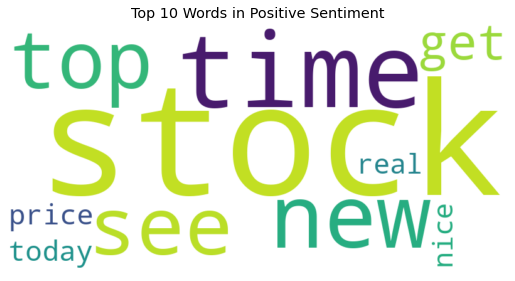

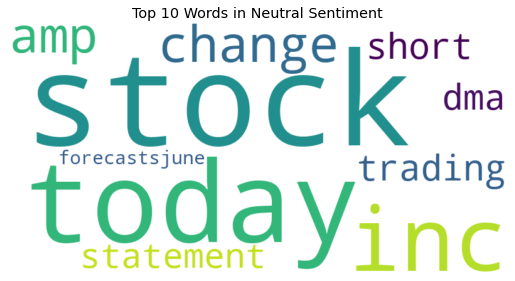

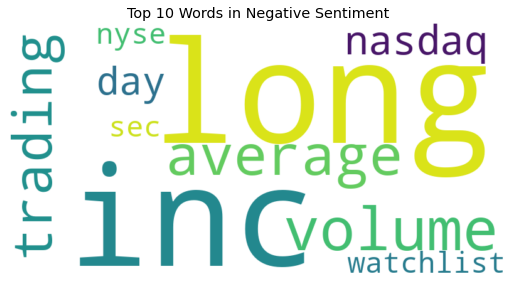

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(dict(top_positive_words), 'Top 10 Words in Positive Sentiment')
generate_wordcloud(dict(top_neutral_words), 'Top 10 Words in Neutral Sentiment')
generate_wordcloud(dict(top_negative_words), 'Top 10 Words in Negative Sentiment')

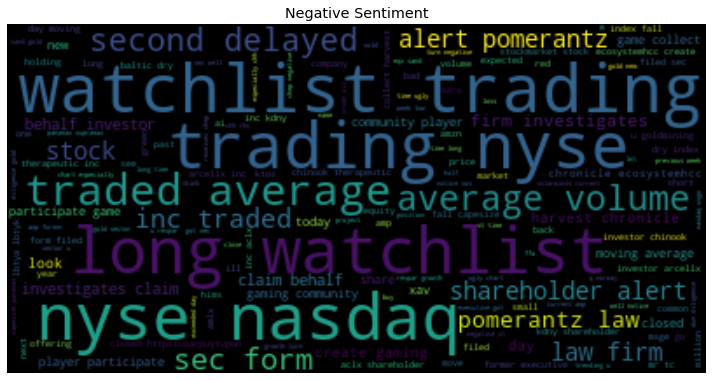

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create separate dataframes for each sentiment class
positive_data = smallcap[smallcap['textblob_sentiment'] == 'Positive']
neutral_data = smallcap[smallcap['textblob_sentiment'] == 'Neutral']
negative_data = smallcap[smallcap['textblob_sentiment'] == 'Negative']

# Concatenate all the text data in each sentiment class
positive_text = ' '.join(positive_data['Tweets'])
neutral_text = ' '.join(neutral_data['Tweets'])
negative_text = ' '.join(negative_data['Tweets'])

# Create word clouds for each sentiment class
positive_wordcloud = WordCloud().generate(positive_text)
neutral_wordcloud = WordCloud().generate(neutral_text)
negative_wordcloud = WordCloud().generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(10, 10))

# Positive word cloud
# plt.subplot(1, 3, 1)
# plt.imshow(positive_wordcloud, interpolation='bilinear')
# plt.title('Positive Sentiment')
# plt.axis('off')

# Neutral word cloud
# plt.subplot(1, 3, 2)
# plt.imshow(neutral_wordcloud, interpolation='bilinear')
# plt.title('Neutral Sentiment')
# plt.axis('off')

# Negative word cloud
# plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.tight_layout()
plt.show()


### actual sentiment

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create separate dataframes for each sentiment class
positive_data = smallcap[smallcap['Manual_Sentiment'] == 'Positive']
neutral_data = smallcap[smallcap['Manual_Sentiment'] == 'Neutral']
negative_data = smallcap[smallcap['Manual_Sentiment'] == 'Negative']

# Concatenate all the text data in each sentiment class
positive_text = ' '.join(positive_data['Tweets'])
neutral_text = ' '.join(neutral_data['Tweets'])
negative_text = ' '.join(negative_data['Tweets'])

# Create word clouds for each sentiment class
positive_wordcloud = WordCloud().generate(positive_text)
neutral_wordcloud = WordCloud().generate(neutral_text)
negative_wordcloud = WordCloud().generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(15, 8))

# Positive word cloud
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

# Neutral word cloud
plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')

# Negative word cloud
plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.tight_layout()
plt.show()


<Figure size 720x576 with 0 Axes>

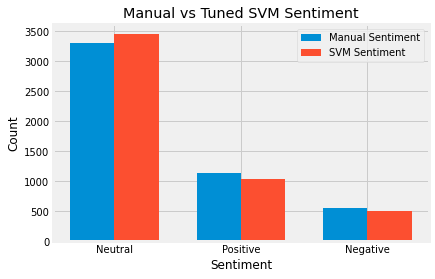

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'bigcap' and contains the 'Manual_Sentiment' and 'svm_sentiment' columns

# Count the occurrences of each sentiment label for 'Manual_Sentiment' column
manual_sentiment_counts = smallcap['Manual_Sentiment'].value_counts()

# Count the occurrences of each sentiment label for 'svm_sentiment' column
svm_sentiment_counts = smallcap['svm_sentiment'].value_counts()

# Get the unique sentiment labels
sentiment_labels = smallcap['Manual_Sentiment'].unique()

# Get the count of each sentiment label for both columns
manual_counts = [manual_sentiment_counts.get(label, 0) for label in sentiment_labels]
svm_counts = [svm_sentiment_counts.get(label, 0) for label in sentiment_labels]

# Sort the data in descending order
sorted_indices = sorted(range(len(manual_counts)), key=lambda i: manual_counts[i], reverse=True)
manual_counts = [manual_counts[i] for i in sorted_indices]
svm_counts = [svm_counts[i] for i in sorted_indices]
sentiment_labels = [sentiment_labels[i] for i in sorted_indices]

# Set the position of the bars on the x-axis
x = range(len(sentiment_labels))

# Set the width of the bars
bar_width = 0.35

plt.figure(figsize=(10, 8))
# Create the grouped bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(x, manual_counts, bar_width, label='Manual Sentiment')
rects2 = ax.bar([val + bar_width for val in x], svm_counts, bar_width, label='SVM Sentiment')

# Add labels, title, and legend
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Manual vs Tuned SVM Sentiment')
ax.set_xticks([val + bar_width/2 for val in x])
ax.set_xticklabels(sentiment_labels)
ax.legend()

# Display the chart
plt.show()
